In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\Combined_data_withID\Final_Raw_CSV_new.csv')
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,30.97084,3.92,96.892530
451266,S35,0.229625,30.97084,9.85,63.530767
451267,S35,0.228344,30.97084,14.94,96.295885
451268,S35,0.229625,30.97084,19.16,70.743014
451269,S35,0.228344,30.97084,22.43,88.357462


<Axes: >

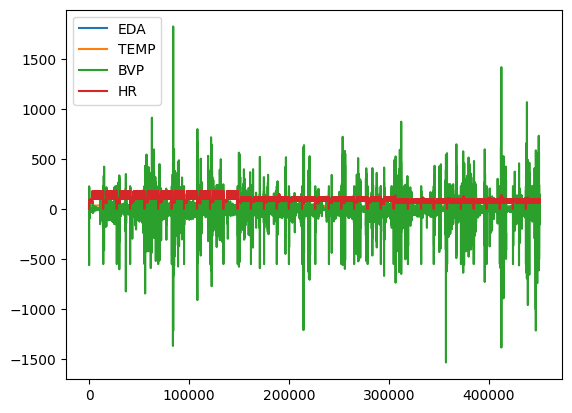

In [4]:
df.plot()

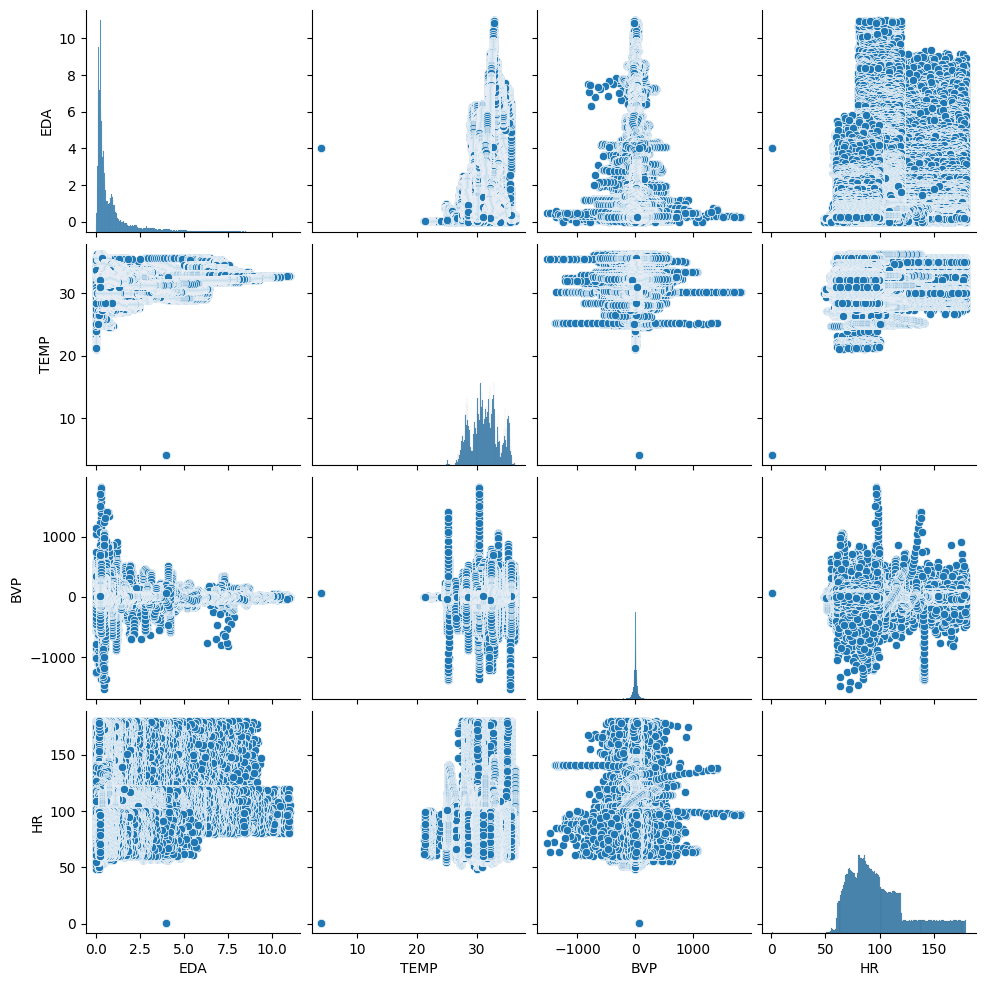

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [7]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.957080,31.290182,0.023578,100.084250
std,1.324882,2.336258,67.463498,28.803738
min,0.000000,4.000000,-1531.900000,1.000000
25%,0.240890,29.690000,-13.710000,79.100000
50%,0.430794,31.310000,1.300000,93.131947
75%,1.040876,32.810000,15.620000,113.755027
max,11.005073,36.390000,1822.090000,179.999246


In [8]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

In [9]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile_final_raw.html")

print("The profiling report has been generated!")


c:\Program Files\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 147.22it/s]

The profiling report has been generated!


In [10]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S04,0.563729,4.00,64.0,1.00
1,S04,-0.000000,33.99,-0.0,83.00
2,S04,0.382858,33.99,-0.0,83.00
3,S04,0.438379,33.99,-0.0,75.33
4,S04,0.414428,33.99,-0.0,70.50


In [11]:
replace_dict = {f'S{str(i).zfill(2)}': str(i) for i in range(2, 36)} 
df['id'] = df['id'].replace(replace_dict)
df.tail()

,id,EDA,TEMP,BVP,HR
451265,35,0.175162,30.97084,3.92,96.892530
451266,35,0.175162,30.97084,9.85,63.530767
451267,35,0.174420,30.97084,14.94,96.295885
451268,35,0.175162,30.97084,19.16,70.743014
451269,35,0.174420,30.97084,22.43,88.357462


c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

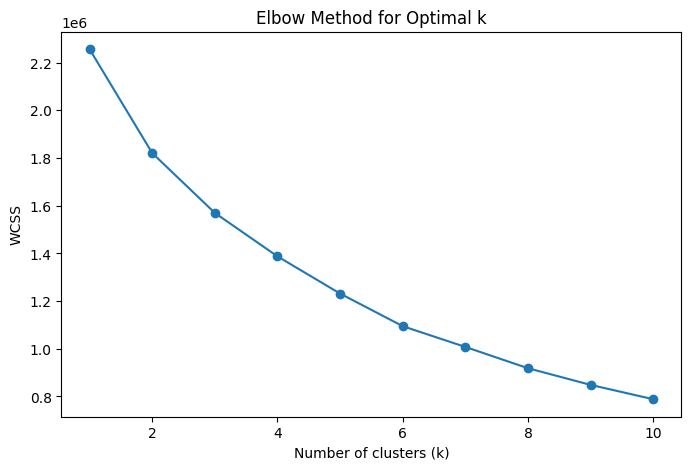

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
 
# Assume df is your DataFrame with unlabeled data
X = df.values  # Convert DataFrame to array
 
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Elbow Method to find optimal k
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
 
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


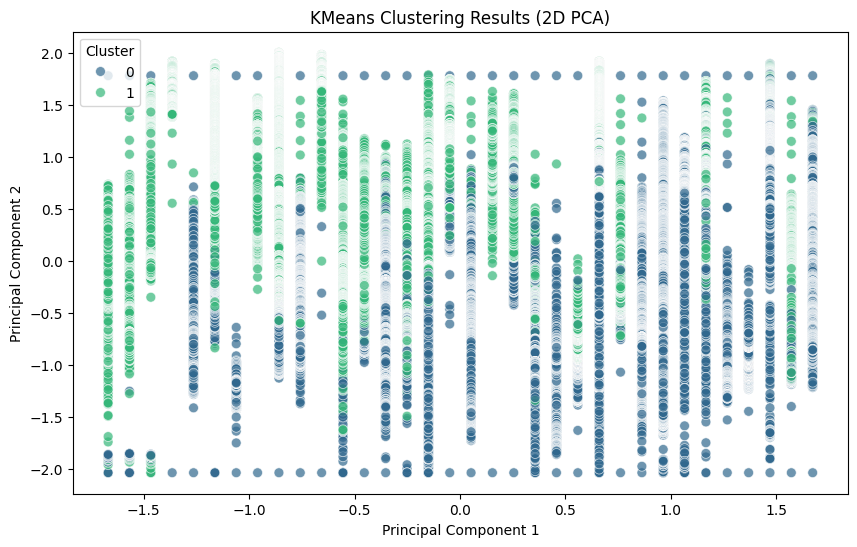

In [13]:
k_optimal = 2 # Set optimal k based on elbow plot
kmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")
cluster_labels = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

  id       EDA   TEMP   BVP     HR  Cluster
0  4  0.563729   4.00  64.0   1.00        0
1  4 -0.000000  33.99  -0.0  83.00        0
2  4  0.382858  33.99  -0.0  83.00        1
3  4  0.438379  33.99  -0.0  75.33        1
4  4  0.414428  33.99  -0.0  70.50        1


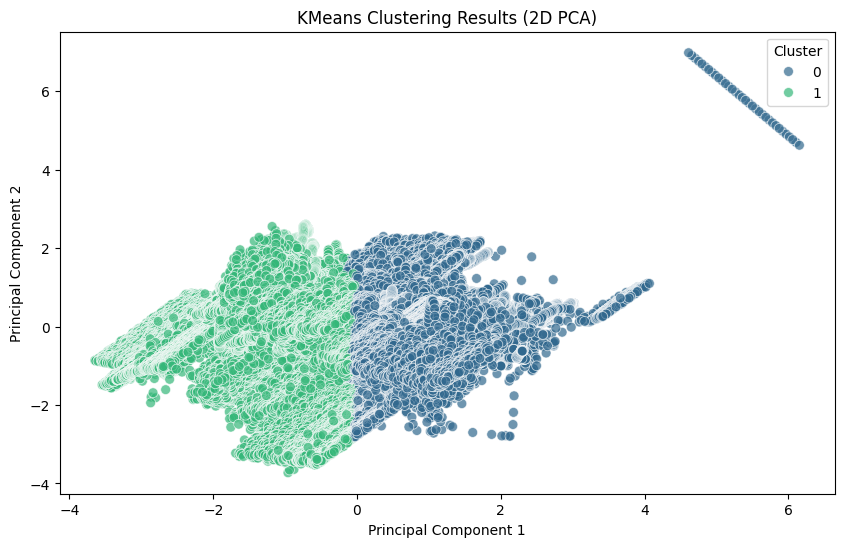

In [14]:
# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels
print(df.head())
 
# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

In [15]:
print(df['Cluster'].value_counts())

Cluster
0    240871
1    210399
Name: count, dtype: int64


In [16]:
df.head()

,id,EDA,TEMP,BVP,HR,Cluster
0,4,0.563729,4.00,64.0,1.00,0
1,4,-0.000000,33.99,-0.0,83.00,0
2,4,0.382858,33.99,-0.0,83.00,1
3,4,0.438379,33.99,-0.0,75.33,1
4,4,0.414428,33.99,-0.0,70.50,1


In [17]:
outcome_avg = df.groupby('id').mean()
outcome_avg

,EDA,TEMP,BVP,HR,Cluster
id,,,,,
10,0.373991,32.213801,-0.000040,97.245151,0.826849
11,0.225461,27.543720,-0.010789,97.218030,0.012192
12,0.556520,32.760121,0.052389,123.087084,0.999626
13,0.234049,35.205327,0.125032,77.533689,0.726702
14,0.291636,31.488747,0.002068,126.189118,0.739112
15,0.236095,30.885455,-0.020022,81.565231,0.082894
16,0.294121,30.184449,-0.019586,126.653939,0.604948
17,0.248205,32.410437,0.023418,95.632741,0.419808
18,0.505267,30.491259,-0.001150,94.918145,0.830495


C:\Users\sahus\AppData\Local\Temp\ipykernel_476\882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
C:\Users\sahus\AppData\Local\Temp\ipykernel_476\882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
C:\Users\sahus\A

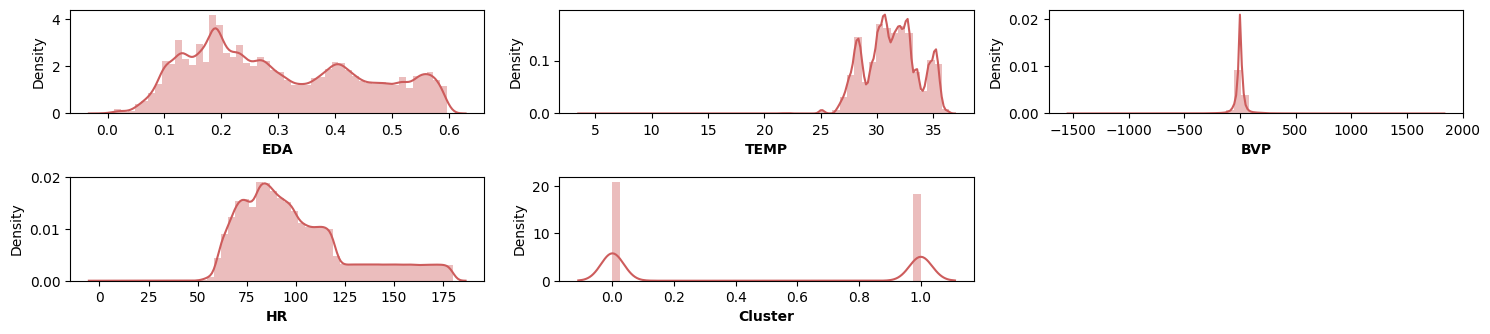

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [24]:
df.to_csv(r'C:\Users\sahus\Stress-Prediction\cluster_new_raw_test.csv', index=False)